###  Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
file_path_org = "C:\\Users\\joelf\\Documents\\Bootcamp\\Data_Analytics\\Module_19\\Neural_Network_Charity_Analysis\\Resources/"
file_path = file_path_org + "charity_data.csv"

application_df = pd.read_csv(file_path)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#Additional column removed to start testing a better performance : application_type / STATUS / SPECIAL CONSIDERATION
application_clean_df = application_df.drop(["EIN","NAME","APPLICATION_TYPE","SPECIAL_CONSIDERATIONS", "STATUS"], axis=1)
application_clean_df.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Independent,C1000,ProductDev,Association,0,5000,1
1,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [4]:
# Determine the number of unique values in each column.
application_clean_df.nunique()

AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
ASK_AMT           8747
IS_SUCCESSFUL        2
dtype: int64

In [5]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_counts = application_clean_df.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

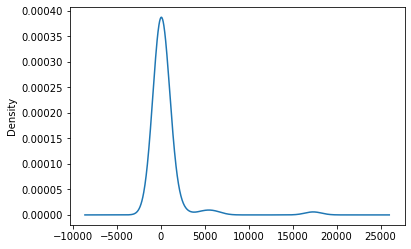

In [6]:
# Visualize the value counts of CLASSIFICATION
CLASSIFICATION_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than 1000
replace_class = list(CLASSIFICATION_counts[CLASSIFICATION_counts < 1000].index)

In [9]:
# Replace in dataframe
for cls in replace_class:
    application_clean_df.CLASSIFICATION = application_clean_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_clean_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_clean_df.dtypes[application_clean_df.dtypes == "object"].index.tolist()
application_cat

['AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_clean_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\joelf\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_clean_df = application_clean_df.merge(encode_df,left_index=True, right_index=True)
application_clean_df = application_clean_df.drop(application_cat,1)
application_clean_df.head()

C:\Users\joelf\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_clean_df["IS_SUCCESSFUL"].values
X = application_clean_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\joelf\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Option 1:  relu - 64 ,relu - 32 , relu - 16. Output: sigmoid

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features_1 = len(X_train[0])
hidden_nodes_layer1_1 = 64
hidden_nodes_layer2_1 = 32
hidden_nodes_layer3_1 = 16

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_1, input_dim=number_input_features_1, activation="relu")
)

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_1, activation="relu"))

# third hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_1, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2048      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt_1/",exist_ok=True)
checkpoint_path = "checkpoints_opt_1/weights.{epoch:02d}.hdf5"

# Compile the model
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback_1 = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

In [17]:
fit_model = nn_1.fit(X_train,y_train,epochs=50, callbacks=[cp_callback_1])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 47155.9453 - accuracy: 0.4857TA: 0
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 33729.7930 - accuracy: 0.5140
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 17341.3574 - accuracy: 0.4866: 0s - loss: 15415.4736 - 
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 11941.3799 - accuracy: 0.5193
Epoch 5/50
783/804 [============================>.] - ETA: 0s - loss: 5968.6694 - accuracy: 0.5063
Epoch 00005: saving model to checkpoints_opt_1\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 10036.3945 - accuracy: 0.5066
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 7299.2734 - accuracy: 0.4948
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 3434.2114 - accuracy: 0.4988
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 3439.9604 - accura

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7673 - accuracy: 0.5333 - 315ms/epoch - 1ms/step
Loss: 0.7672579288482666, Accuracy: 0.5332944393157959


In [19]:
nn_1.save("AlphabetSoupCharity_Optimization_1.h5")

### Option 2: relu - 80, relu - 40, leaky_relu - 20, leaky_relu - 10

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features_2 = len(X_train[0])
hidden_nodes_layer1_2 = 80
hidden_nodes_layer2_2 = 40
hidden_nodes_layer3_2 = 20
hidden_nodes_layer4_2 = 10

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_2, input_dim=number_input_features_2, activation="relu")
)

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_2, activation="relu"))

# third hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_2, activation="leaky_relu"))

# fourth hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer4_2, activation="leaky_relu"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                2560      
                                                                 
 dense_5 (Dense)             (None, 40)                3240      
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,841
Trainable params: 6,841
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt_2/",exist_ok=True)
checkpoint_path = "checkpoints_opt_2/weights.{epoch:02d}.hdf5"

# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback_2 = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

In [23]:
fit_model = nn_2.fit(X_train,y_train,epochs=50, callbacks=[cp_callback_2])

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 22441.6602 - accuracy: 0.4915
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 4778.2119 - accuracy: 0.4931
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 5277.3467 - accuracy: 0.5094
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 14063.0059 - accuracy: 0.4981
Epoch 5/50
770/804 [===========================>..] - ETA: 0s - loss: 5282.5859 - accuracy: 0.5058  ETA: 1s - loss: 8495.300
Epoch 00005: saving model to checkpoints_opt_2\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 5118.4160 - accuracy: 0.5036
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 2235.2266 - accuracy: 0.5089
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 2137.6345 - accuracy: 0.4906
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 1727.4548 - accuracy: 0.51

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6899 - accuracy: 0.5531 - 298ms/epoch - 1ms/step
Loss: 0.6899036765098572, Accuracy: 0.5531195402145386


In [25]:
nn_2.save("AlphabetSoupCharity_Optimization_2.h5")

### Option 3: leaky_relu - 40, leaky_relu - 20

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features_3 = len(X_train[0])
hidden_nodes_layer1_3 = 40
hidden_nodes_layer2_3 = 20

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_3, input_dim=number_input_features_3, activation="leaky_relu")
)

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_3, activation="leaky_relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 40)                1280      
                                                                 
 dense_10 (Dense)            (None, 20)                820       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt_3/",exist_ok=True)
checkpoint_path = "checkpoints_opt_3/weights.{epoch:02d}.hdf5"

# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback_3 = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

In [28]:
fit_model = nn_3.fit(X_train,y_train,epochs=50, callbacks=[cp_callback_3])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 43877.3906 - accuracy: 0.4878: 0s - loss: 36661.332
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 17693.8691 - accuracy: 0.5044
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 22314.0137 - accuracy: 0.5014
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 23470.4648 - accuracy: 0.4938
Epoch 5/50
794/804 [============================>.] - ETA: 0s - loss: 45410.4219 - accuracy: 0.5081 ETA: 0s - loss: 552
Epoch 00005: saving model to checkpoints_opt_3\weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 44911.5664 - accuracy: 0.5077
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 20916.7988 - accuracy: 0.4967
Epoch 7/50
804/804 [==============================] - 3s 3ms/step - loss: 45747.9688 - accuracy: 0.5096
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 2606

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6769 - accuracy: 0.5373 - 283ms/epoch - 1ms/step
Loss: 0.6768791079521179, Accuracy: 0.5372594594955444


In [30]:
nn_3.save("AlphabetSoupCharity_Optimization_3.h5")

### Option 4: Random Forest

In [31]:
##########################################
#RANDOM FORECAST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.687


### Option 5: relu 64 , tanh 32 , leaky_relu 16

In [32]:
#Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features_5 = len(X_train[0])
hidden_nodes_layer1_5 = 64
hidden_nodes_layer2_5 = 32
hidden_nodes_layer3_5 = 16

nn_5 = tf.keras.models.Sequential()

# First hidden layer
nn_5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1_5, input_dim=number_input_features_5, activation="relu")
)

# Second hidden layer
nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_5, activation="tanh"))

# Third hidden layer
nn_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_5, activation="leaky_relu"))

# Output layer
nn_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2048      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
fit_model = nn_5.fit(X_train,y_train,epochs=50, callbacks=[cp_callback_3])

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.6945 - accuracy: 0.5196
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5259
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5239
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5259
Epoch 5/50
802/804 [============================>.] - ETA: 0s - loss: 0.6926 - accuracy: 0.5218
Epoch 00005: saving model to checkpoints_opt_3\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5218
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5221
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5259
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5269
Epoch 9/50
804/804 [==============================] 

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6915 - accuracy: 0.5332 - 395ms/epoch - 1ms/step
Loss: 0.6915088891983032, Accuracy: 0.5331778526306152
